In [ ]:
!pip install langdetect

In [ ]:
!pip install pyLDAvis

In [34]:
# not necessary
# added to suppress warnings coming from pyLDAvis

import warnings
warnings.filterwarnings('ignore')

# plotting
import matplotlib.pyplot
%matplotlib inline

In [63]:
import langdetect  # language detection
import nltk  # natural language processing
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
import numpy  # arrays and matrices
import pandas  # dataframes
import pyLDAvis  # plotting
import pyLDAvis.sklearn  # plotting
import regex  # regular expressions
import string
from unicodedata import normalize
import sklearn  # machine learning

In [64]:
# installing specific word dictionarys
# used for stopword removal and lemmatization

nltk.download("words")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package words to /home/alexander/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alexander/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
path = 'agregado_vacantes_scraping_20210701.xlsx'
df = pandas.read_excel(path)
df.head()

,Cargo,Descripcion,Educacion requerida,Experiencia requerida (meses),Tipo de empleo,Empresa,Sector,Cantidad de aplicantes,Fecha de publicacion,Fecha de expiracion,Ciudad,Pais,Url vacante
0,Financial Controller,&lt;p&gt;¡Estás interesado en hacer parte de u...,bachelor degree,NaN,FULL_TIME,Adbid - Marketing Digital para E-commerce,Marketing y publicidad,147 solicitudes,2021-06-25T14:01:05.000Z,2021-07-25T14:01:04.000Z,Bogotá,CO,https://co.linkedin.com/jobs/view/financial-co...
1,Asistente de Gerencia RPO,DESCRIPCIÓN DEL PUESTO&lt;br&gt;&lt;br&gt;Dar ...,NaN,NaN,FULL_TIME,GRUPO STT,Contabilidad,194 solicitudes,2021-06-26T01:11:33.000Z,2021-07-26T01:11:33.000Z,Bogotá,CO,https://co.linkedin.com/jobs/view/asistente-de...
2,Regional Communication Manager LATAM,Regional Communication Manager LATAM&lt;br&gt;...,bachelor degree,120.0,FULL_TIME,ABB,Manufactura eléctrica/electrónica,94 solicitudes,2021-06-19T00:00:00.000Z,2021-07-23T07:29:47.000Z,Bogotá,CO,https://co.linkedin.com/jobs/view/regional-com...
3,Especialista Lean,&lt;strong&gt;Especialista Lean&lt;br&gt;&lt;/...,NaN,NaN,FULL_TIME,Michael Page,"Telecomunicaciones,Biotecnología,Servicios y t...",NaN,2021-05-31T23:16:51.000Z,2021-07-25T23:16:50.000Z,Bogotá,CO,https://co.linkedin.com/jobs/view/especialista...
4,Gerencia Comercial,&lt;strong&gt;Gerencia Comercial&lt;br&gt;&lt;...,bachelor degree,NaN,FULL_TIME,Michael Page,"Ingeniería industrial o mecánica,Manufactura e...",NaN,2021-05-31T23:16:49.000Z,2021-07-25T23:16:49.000Z,Colombia,CO,https://co.linkedin.com/jobs/view/gerencia-com...


In [66]:
df = df[["Cargo", "Descripcion", "Fecha de publicacion", "Fecha de expiracion"]]
df.columns

Index(['Cargo', 'Descripcion', 'Fecha de publicacion', 'Fecha de expiracion'], dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cargo                 678 non-null    object
 1   Descripcion           678 non-null    object
 2   Fecha de publicacion  678 non-null    object
 3   Fecha de expiracion   678 non-null    object
dtypes: object(4)
memory usage: 21.3+ KB


In [68]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 656
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cargo                 428 non-null    object
 1   Descripcion           428 non-null    object
 2   Fecha de publicacion  428 non-null    object
 3   Fecha de expiracion   428 non-null    object
dtypes: object(4)
memory usage: 16.7+ KB


In [69]:
# define quick look function for data frame

def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))
    
dataframe_quick_look(df, nrows=2)

SHAPE:
(428, 4)

COLUMN NAMES:
Index(['Cargo', 'Descripcion', 'Fecha de publicacion', 'Fecha de expiracion'], dtype='object')

HEAD:
                       Cargo  \
0      Financial Controller    
1  Asistente de Gerencia RPO   

                                         Descripcion  \
0  &lt;p&gt;¡Estás interesado en hacer parte de u...   
1  DESCRIPCIÓN DEL PUESTO&lt;br&gt;&lt;br&gt;Dar ...   

       Fecha de publicacion       Fecha de expiracion  
0  2021-06-25T14:01:05.000Z  2021-07-25T14:01:04.000Z  
1  2021-06-26T01:11:33.000Z  2021-07-26T01:11:33.000Z  



In [70]:
# data set came with prespecified topics
# print the topics out with counts

print("TOPICS:\n{topics}\n".format(topics=df["Cargo"].value_counts()))

TOPICS:
Auxiliar administrativo                             11
Recepcionista hotel                                  7
Auxiliar servicio al cliente                         6
Jefe logística                                       5
Auxiliar administrativo en salud                     4
                                                    ..
Investment Associate                                 1
Director de Transformación de Procesos y Calidad     1
Director ejecutivo organización no gubernamental     1
Managing Director Colombia                           1
Auxiliar de archivo                                  1
Name: Cargo, Length: 341, dtype: int64



In [71]:
# view final data that will be carried forward

raw = df['Descripcion'].tolist()
print("HEADLINES:\n{lines}\n".format(lines=raw[:2]))
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['&lt;p&gt;¡Estás interesado en hacer parte de una de las mejores agencias de Marketing Digital!&lt;/p&gt;&lt;p&gt;&lt;br&gt;&lt;/p&gt;&lt;p&gt;Si eres profesional en alguna de las siguientes carreras: Administración de Empresas, Ingeniería Industrial, Economía, Finanzas, con conocimientos financieros y de planeación financiera, experiencia superior a 2 años, ser muy analítico(a) y con liderazgo, puedes postularte o enviarnos tu hoja de vida a Johanna.rodriguez@adbid.com.co para revisar tu perfil y de ajustarse nos pondremos en contacto.&lt;/p&gt;&lt;p&gt;&lt;br&gt;&lt;/p&gt;&lt;ul&gt;&lt;li&gt;¡Si cuentas con estas características postúlate aquí! te ofrecemos excelente plan de beneficios, crecimiento a nivel personal y profesional, salario a convenir.&lt;/li&gt;&lt;/ul&gt;', 'DESCRIPCIÓN DEL PUESTO&lt;br&gt;&lt;br&gt;Dar apoyo administrativo, logístico y asistencial a las actividades necesarias para la facilitación del trabajo del departamento, con la confidencialidad que a

In [72]:
# check language of headline
# filter to english only

def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

In [73]:
# define function to perform lemmatization

def do_lemmatizing(wrd):
    out = WordNetLemmatizer().lemmatize(wrd)
    return (wrd if out is None else out)

In [74]:
# define function to cleaning tweet data

def do_text_cleaning(txt):
    # identify language of tweet
    # return null if language not english
    lg = do_language_identifying(txt)
    if lg != 'es':
        return None
    
     # Remove text in square brackets, remove punctuation and remove words containing numbers.
    txt = regex.sub(r"\[.*?¿\]\%", " ", txt)
    txt = regex.sub(r"https://", "", txt)
    txt = regex.sub(r"www.", "", txt)
    txt = regex.sub(r"[‘’“”…«»]", "", txt)
    txt = regex.sub(r'["\[\]\{\}]', "", txt)
    txt = regex.sub(r"_", " ", txt)
    txt = regex.sub(r"[%s]" % regex.escape(string.punctuation), " ", txt)
    txt = regex.sub(r"\w*\d\w*", "", txt)
    txt = regex.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize("NFD", txt), 0, regex.I
    )
    txt = regex.sub(r"\n", " ", txt)
    txt = regex.sub(r"&lt;/?.*?&gt;", " &lt;&gt; ", txt)

    # Eliminar caracteres que se repitan más de dos veces seguidas
    pattern = regex.compile(r"(.)\1{2,}")
    txt = pattern.sub(r"\1\1", txt)

    
    # split the string on whitespace
    out = txt.split(' ')
   
    
    # identify screen names
    # replace with SCREENNAME
    out = ['SCREENNAME' if i.startswith('@') else i for i in out]
    
    # identify urls
    # replace with URL
    out = [
        'URL' if bool(regex.search('http[s]?://', i)) 
        else i for i in out
    ]
    
    # remove all punctuation
    out = [regex.sub('[^\\w\\s]|\n', '', i) for i in out]
    
    # make all non-keywords lowercase
    keys = ['SCREENNAME', 'URL']
    out = [i.lower() if i not in keys else i for i in out]
    
    # remove keywords
    out = [i for i in out if i not in keys]
    
    # remove stopwords
    list_stop_words = set(nltk.corpus.stopwords.words('spanish'))
    include_stopwords = {"mas", "menos", "null", "none"}
    list_stop_words |= include_stopwords
    list_stop_words = [regex.sub('[^\\w\\s]', '', i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # lemmatizing
    out = [do_lemmatizing(i) for i in out]
    
    # keep words 4 or more characters long
    out = [i for i in out if len(i) >= 4]
    
    return out

In [165]:
# apply cleaning function to every tweet

clean = list(map(do_text_cleaning, raw))

In [166]:
# remove none types

clean = list(filter(None.__ne__, clean))
print("HEADLINES:\n{lines}\n".format(lines=clean[:2]))
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['interesado', 'hacer', 'parte', 'mejores', 'agencias', 'marketing', 'digital', 'profesional', 'alguna', 'siguientes', 'carreras', 'administracion', 'empresas', 'ingenieria', 'industrial', 'economia', 'finanzas', 'conocimientos', 'financieros', 'planeacion', 'financiera', 'experiencia', 'superior', 'años', 'analitico', 'liderazgo', 'puedes', 'postularte', 'enviarnos', 'hoja', 'vida', 'johanna', 'rodriguez', 'adbid', 'revisar', 'perfil', 'ajustarse', 'pondremos', 'contacto', 'cuentas', 'caracteristicas', 'postulate', 'aqui', 'ofrecemos', 'excelente', 'plan', 'beneficios', 'crecimiento', 'nivel', 'personal', 'profesional', 'salario', 'convenir'], ['descripcion', 'puesto', 'apoyo', 'administrativo', 'logistico', 'asistencial', 'actividades', 'necesarias', 'facilitacion', 'trabajo', 'departamento', 'confidencialidad', 'amerita', 'puesto', 'descripcion', 'role', 'cumplimiento', 'politicas', 'procedimientos', 'politicas', 'internas', 'politicas', 'procedimientos', 'area', 'sopor

In [167]:
# turn tokens back into strings
# concatenate using whitespaces

clean_sentences = [" ".join(i) for i in clean]
clean_sentences[0:5]

['interesado hacer parte mejores agencias marketing digital profesional alguna siguientes carreras administracion empresas ingenieria industrial economia finanzas conocimientos financieros planeacion financiera experiencia superior años analitico liderazgo puedes postularte enviarnos hoja vida johanna rodriguez adbid revisar perfil ajustarse pondremos contacto cuentas caracteristicas postulate aqui ofrecemos excelente plan beneficios crecimiento nivel personal profesional salario convenir',
 'descripcion puesto apoyo administrativo logistico asistencial actividades necesarias facilitacion trabajo departamento confidencialidad amerita puesto descripcion role cumplimiento politicas procedimientos politicas internas politicas procedimientos area soporte administrativo brindar apoyo procesos administrativos realice departamento llevar control optimo agenda calendario actividades reuniones citas contestar revisar tipo documentos mail llamadas telefonicas diligenciar formularios recopilar i

### Count Vectorizer

In [211]:
# define some global variables

number_words = 5
number_docs = 5
number_features = 500

In [245]:
# execute bag of words model
# use raw term counts for lda 
# as it is a probabilistic graphical model

vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(
    analyzer="word",
    max_df=0.65, 
    min_df=0.15, 
    max_features=number_features
)
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

feature_names_vec1 = vectorizer1.get_feature_names()

  (0, 31)	2
  (0, 5)	1
  (0, 0)	1
  (0, 23)	1
  (0, 21)	1
  (0, 12)	1
  (0, 17)	1
  (0, 2)	1
  (0, 27)	1
  (0, 26)	1
  (0, 29)	1


### Select Number of Topics

In [246]:
# define function to calculate perplexity for LDA model trained on ntopics

def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0
        )
        lda.fit(data)
        
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        
    output_df = pandas.DataFrame(output_dict)
    
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
        
    return (output_df, output_num_topics)

In [247]:
# find perplexity scores for several different numbers of topics
# takes several minutes

df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    clean_vec1, 
    ntopics=[1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15]
)
print(df_perplexity)

    Number Of Topics  Perplexity Score
0                  1         27.643441
1                  2         26.701483
2                  3         26.082709
3                  4         26.954830
4                  6         25.999518
5                  8         26.688507
6                 10         27.263566
7                 11         27.463771
8                 12         27.459466
9                 13         27.995714
10                14         28.353824
11                15         28.539696


<AxesSubplot:xlabel='Number Of Topics'>

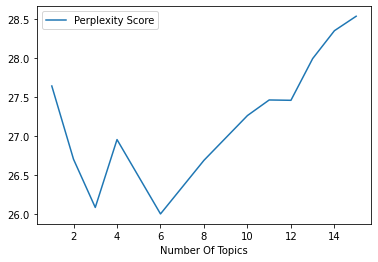

In [248]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

In [258]:
optimal_num_topics = 3

In [259]:
# define and fit LDA model

lda = sklearn.decomposition.LatentDirichletAllocation(
    n_components=optimal_num_topics,
    learning_method="online",
    random_state=0
)
lda.fit(clean_vec1)

LatentDirichletAllocation(learning_method='online', n_components=3,
                          random_state=0)

In [260]:
# output matrix
# h: docs to topics

lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(341, 3)
[[0.9422133  0.02863054 0.02915616]
 [0.92509287 0.06904575 0.00586138]
 [0.23509578 0.00864814 0.75625608]
 ...
 [0.94185255 0.02915126 0.02899619]
 [0.55856035 0.09023305 0.3512066 ]
 [0.88973958 0.05182533 0.05843509]]


In [261]:
# output matrix
# w: words to topics

lda_components = lda.components_
print(lda_components.shape)
print(lda_components)

(3, 38)
[[5.57499062e+01 4.73053275e+01 8.05091165e+01 5.95583698e+01
  5.75355533e+01 3.59255913e+01 4.62049704e+01 2.41732215e+01
  9.38191071e+00 9.55056656e-01 4.98856070e+01 5.11617512e+01
  4.20282377e+01 1.78605120e+01 3.05484740e+01 3.23053338e+01
  8.13251039e+01 1.94466182e+02 9.55592420e+01 1.60318107e+01
  8.02635553e+00 3.57897419e+01 7.37851828e+00 2.39801995e+01
  2.21975915e+01 1.33604827e+02 2.38162161e+01 5.66146730e+01
  5.86242947e+01 6.85051201e+01 9.69474115e+01 8.04264772e+01
  3.28800722e+00 2.78784735e+01 5.38723970e+01 8.18331670e-01
  2.70958820e+00 1.06431086e+02]
 [7.85247834e+00 7.87539320e+00 1.19969343e+01 3.53699925e+00
  7.11259223e+00 4.06686349e+00 1.58474373e+00 4.15657146e+00
  3.13197421e+01 5.73176808e+01 3.09836865e+00 2.43919264e+00
  2.58109155e+00 3.64583351e+00 6.92855399e+00 7.00008596e+01
  7.47297965e+00 2.01906933e+01 6.07447853e+00 5.91128725e+01
  2.53663479e+01 1.45135499e+01 8.79174898e+01 2.03743204e+01
  2.57729211e+00 5.94987501e+

In [262]:
# define function to reformat output matrices into easily readable tables

def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

In [263]:
# run function

W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [264]:
# word-topic table
print(W_df)

                      Topic0                  Topic1                 Topic2
Word0  (0.1057, experiencia)   (0.1329, informacion)       (0.3826, strong)
Word1       (0.0726, manejo)       (0.1058, empresa)  (0.0529, experiencia)
Word2      (0.0579, trabajo)        (0.1032, strong)           (0.0335, an)
Word3     (0.0527, procesos)   (0.0894, habilidades)           (0.0321, os)
Word4       (0.052, gestion)  (0.0866, competencias)     (0.0316, clientes)


In [265]:
# document-topic table
print(H_df)

                                                 Topic0  \
Doc0  (0.9737, Creación de estrategias de Ventas Man...   
Doc1  (0.9725, Estamos contratando Talento para Bogo...   
Doc2  (0.9649, &lt;p&gt;&lt;strong&gt;***Native Engl...   
Doc3  (0.9596, &lt;p&gt;DAI está buscando candidatos...   
Doc4  (0.9595, &lt;strong&gt;Reporta a&lt;/strong&gt...   

                                                 Topic1  \
Doc0  (0.9391, &lt;strong&gt;Especialista de Bebidas...   
Doc1  (0.888, 1 Capacidad la aplicación de red así c...   
Doc2  (0.888, Capacidad de seguir instrucciones escr...   
Doc3  (0.888, ¿Te apasionan las finanzas corporativa...   
Doc4  (0.888, Nuestro coordinador de gestión comerci...   

                                                 Topic2  
Doc0  (0.986, 50 tiempo en oficina y 50 viajar a var...  
Doc1  (0.9857, &lt;p&gt;Somos una empresa joven e in...  
Doc2  (0.9852, &lt;p&gt;Pertenecer al Grupo Bolívar ...  
Doc3  (0.9844, &lt;p&gt;&lt;strong&gt;Descripción:&a...  


### Visualizing LDA

In [266]:
# iterative visualization
# featuring pca biplot and histogram
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

In [267]:
# define functiont to fit and plot t-SNE model

def plot_tsne(data, threshold):
    # filter data according to threshold
    index_meet_threshold = numpy.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    
    # fit tsne model
    # x-d -> 2-d, x = number of topics
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    
    print("LENGTH:\n{}\n".format(len(most_prob_topic)))

    unique, counts = numpy.unique(
        numpy.array(most_prob_topic), 
        return_counts=True
    )

    print("COUNTS:\n{}\n".format(numpy.asarray((unique, counts)).T))
    
    # make plot
    matplotlib.pyplot.figure(figsize=(10,6))
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in list(set(most_prob_topic)):
        indices = [idx for idx, val in enumerate(most_prob_topic) if val == i]
        matplotlib.pyplot.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=0.25
        )
    
    
    matplotlib.pyplot.xlabel('x-tsne')
    matplotlib.pyplot.ylabel('y-tsne')
    matplotlib.pyplot.legend(markerscale=10)

LENGTH:
341

COUNTS:
[[  0 211]
 [  1  51]
 [  2  79]]



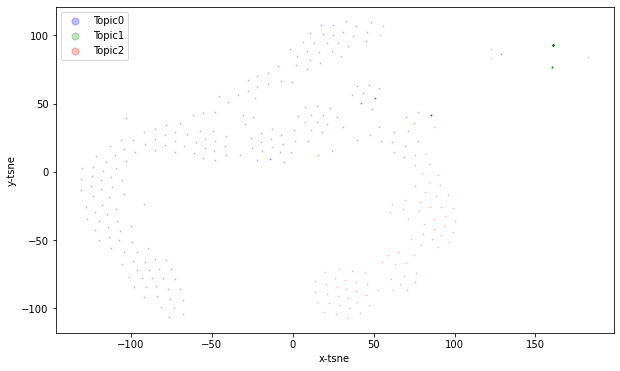

In [286]:
plot_tsne(data=lda_transform, threshold=0)

In [277]:
# define and fit nmf model

nmf = sklearn.decomposition.NMF(
    n_components=4,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    random_state=0, 
    alpha=0.1, 
    l1_ratio=0.5
)
nmf.fit(clean_vec1)

NMF(alpha=0.1, init='nndsvda', l1_ratio=0.5, n_components=4, random_state=0,
    solver='mu')

In [278]:
# run function to produce nice output tables

W_df, H_df = get_topics(
    mod=nmf,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [279]:
# word-topic table
print(W_df)

                     Topic0                    Topic1                  Topic2  \
Word0       (0.518, strong)     (0.1844, experiencia)      (0.2813, procesos)   
Word1      (0.0345, compan)              (0.0865, an)       (0.1208, gestion)   
Word2          (0.0299, ia)              (0.0763, os)  (0.0613, conocimiento)   
Word3  (0.0271, ingenieria)     (0.0558, profesional)       (0.0421, trabajo)   
Word4         (0.027, area)  (0.0523, administracion)        (0.0419, manejo)   

                   Topic3  
Word0    (0.166, cliente)  
Word1  (0.1152, servicio)  
Word2    (0.1075, equipo)  
Word3   (0.0987, trabajo)  
Word4   (0.0731, empresa)  


In [280]:
# document-topic table
print(H_df)

                                                 Topic0  \
Doc0  (1.9105, Habilidades matematicas Responsabilid...   
Doc1  (1.4698, En el espacio asignado de Habilidades...   
Doc2  (1.4546, &lt;strong&gt;Investment Associate in...   
Doc3  (1.4458, &lt;p&gt;Consecución, negociación y m...   
Doc4  (1.4405, &lt;p&gt;Somos una empresa joven e in...   

                                                 Topic1  \
Doc0  (0.9909, Habilidades matematicas Responsabilid...   
Doc1  (0.9706, &lt;p&gt;We are goFLUENT, a multi-awa...   
Doc2  (0.8558, Planeación seguimiento de gestión del...   
Doc3  (0.8168, &lt;strong&gt;Dirección de Mercadeo (...   
Doc4  (0.8045, &lt;p&gt;LumiQualis seeks a Directory...   

                                                 Topic2  \
Doc0  (3.1297, &lt;strong&gt;Coordinación de Recurso...   
Doc1  (1.6495, &lt;strong&gt;Gerencia de Negocios&lt...   
Doc2  (1.487, &lt;p&gt;Pertenecer al Grupo Bolívar e...   
Doc3  (1.307, Creación de estrategias de Ventas Mane..

In [281]:
# output raw document-topic matrix for t-SNE plot
nmf_transform = nmf.transform(clean_vec1)
print(nmf_transform.shape)
print(nmf_transform)

(341, 4)
[[3.40228379e-03 3.13596437e-01 2.09130054e-06 2.55298654e-03]
 [3.59048409e-09 3.45975596e-01 5.71296018e-01 2.14172770e+00]
 [1.28266218e+00 8.72177669e-02 9.69970392e-01 1.05117802e-04]
 ...
 [1.14013619e-06 2.10865981e-01 2.63436941e-06 3.41093544e-01]
 [2.38526977e-03 1.88020354e-02 3.91512375e-04 1.01802875e-02]
 [5.26326892e-04 1.36878676e-01 3.46119110e-03 6.58827298e-02]]


LENGTH:
341

COUNTS:
[[  0  76]
 [  1 101]
 [  2  42]
 [  3 122]]



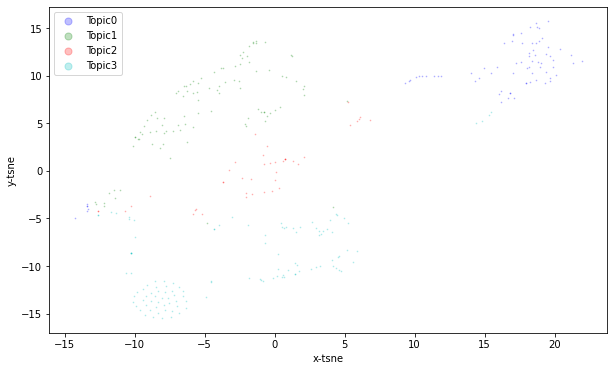

In [285]:
# run function to produce t-SNE plot
plot_tsne(data=nmf_transform, threshold=0)